In [57]:
import pandas as pd
data=pd.read_csv("datasetComputersPreprocessed.csv")

In [58]:
data=data.iloc[0:5000]

In [59]:
data = data.loc[pd.isna(data["reviewText"])==False]

In [60]:
data

,Unnamed: 0,Unnamed: 0.1,overall,reviewText,main_cat,reviewTextNormalized,reviewTextStopwords,reviewTextLemmatized,reviewTextWordnetEnglish,reviewTextStemmed
0,4,136,2.0,I bought this thinking it would be a great rep...,Computers,i bought this thinking it would be a great rep...,bought thinking would great replacement worn p...,bought thinking would great replacement worn p...,bought thinking would great replacement worn p...,bought think would great replac worn power cab...
1,18,150,1.0,real garbage don't wast your money,Computers,real garbage dont wast your money,real garbage dont wast money,real garbage dont wast money,real garbage dont wast money,real garbag dont wast money
2,56,219,2.0,Doesn't get great contact.,Computers,doesnt get great contact,doesnt get great contact,doesnt get great contact,doesnt get great contact,doesnt get great contact
3,60,223,1.0,did not work,Computers,did not work,work,work,work,work
4,75,238,2.0,"A decent case, but still a little bulky.",Computers,a decent case but still a little bulky,decent case still little bulky,decent case still little bulky,decent case still little bulky,decent case still littl bulki
5,87,866,1.0,Bondi Player already out dated and not working...,Computers,bondi player already out dated and not working...,bondi player already dated working year purcha...,bondi player already dated working year purcha...,player already working year purchase need jail...,player alreadi work year purchas need jail bro...
6,89,868,2.0,I'm sorry to say I was not even able to instal...,Computers,im sorry to say i was not even able to install...,im sorry say even able install hard drive usin...,im sorry say even able install hard drive usin...,sorry say even able install hard drive window ...,sorri say even abl instal hard drive window re...
7,91,887,2.0,didnt work,Computers,didnt work,didnt work,didnt work,didnt work,didnt work
8,93,889,1.0,Doesn't work!,Computers,doesnt work,doesnt work,doesnt work,doesnt work,doesnt work
9,95,891,2.0,I got this item a while ago and at first it wo...,Computers,i got this item a while ago and at first it wo...,got item ago first worked great sound video co...,got item ago first worked great sound video co...,got item ago first worked great sound video co...,got item ago first work great sound video come...


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import pandas as pd

In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [63]:
data = data.drop_duplicates('reviewText')

In [64]:
len(data)

4915

In [65]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = data['reviewText'].values
desc=desc[desc==desc]
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [66]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[5000:5100])

14149
['facilities', 'facility', 'facing', 'facp', 'fact', 'factor', 'factors', 'factory', 'facts', 'factual', 'fade', 'faded', 'fades', 'fading', 'fail', 'failed', 'failing', 'fails', 'failure', 'failured', 'failures', 'faint', 'fair', 'fairly', 'fairness', 'faith', 'faithful', 'faithfully', 'fake', 'fakes', 'fakespot', 'fall', 'fallen', 'falling', 'falls', 'false', 'falsehoods', 'falsely', 'falsing', 'familiar', 'family', 'familyroom', 'famous', 'famously', 'fan', 'fanatic', 'fanboy', 'fanboys', 'fancier', 'fancy', 'fanfold', 'fans', 'fantasizing', 'fantastic', 'fantastically', 'fantom', 'faq', 'far', 'farce', 'farewell', 'farmer', 'farther', 'fascinate', 'fashion', 'fashioned', 'fast', 'fasten', 'fastened', 'fastener', 'fastens', 'faster', 'fastest', 'fasthome', 'fat', 'fat32', 'fatal', 'fatality', 'fatally', 'fate', 'father', 'fathom', 'fatigue', 'fatter', 'fault', 'faults', 'faulty', 'faux', 'favor', 'favorable', 'favorite', 'fax', 'faxes', 'faxing', 'fbtoo1', 'fcc', 'fdd', 'fear'

In [67]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [68]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50])

C:\Users\abdel\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


8755
["''", "'s", 'aa', 'aaah', 'aaapric', 'aak', 'aamazon', 'ab', 'aback', 'abandon', 'abcd', 'abil', 'abilti', 'abl', 'abnorm', 'abort', 'abou', 'abound', 'abov', 'absenc', 'absent', 'absolut', 'absolutley', 'absoluto', 'absorb', 'absurd', 'abus', 'abysm', 'ac', 'acc', 'acceler', 'accent', 'accept', 'access', 'accessori', 'accesspoint', 'accid', 'accident', 'accidentali', 'accidenti', 'accolad', 'accommod', 'accomod', 'accompani', 'accomplish', 'accord', 'account', 'accoust', 'accumul', 'accur']


In [69]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

C:\Users\abdel\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


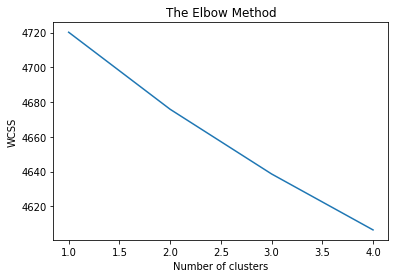

In [73]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,5):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,5),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : product, lock, dont, work, kensington, key, terribl, buy, use, abl, qualiti, fit, devic, great, poor, order, peopl, know, like, got, review, descript, star, dispen, streak
1 : work, card, plug, drive, return, play, window, tri, use, bought, read, driver, month, doesnt, didnt, monitor, problem, cheap, buy, good, disc, dont, money, unit, comput
2 : cabl, charg, phone, charger, galaxi, fit, work, use, tablet, cord, batteri, plug, foot, short, connect, came, data, nexu, far, doesnt, bought, buy, worth, standard, note


In [32]:
kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : card, drive, work, phone, tri, read, plug, time, use, wast, bought, instal, problem, wont, money, buy, disappoint, new, format, reader, item, disc, burn, garbag, play
1 : work, window, didnt, driver, doesnt, plug, play, cheap, bought, appl, win, player, buy, devic, p, keyboard, say, tri, pro, drive, item, surfac, mous, recogn, dell
2 : return, monitor, cord, month, dri, day, year, dont, work, need, receiv, wipe, good, got, wish, comput, broke, great, plug, read, particular, alreadi, happi, problem, like
3 : lock, product, use, kensington, dont, key, order, terribl, work, buy, abl, unit, home, fit, good, poor, descript, mechan, qualiti, disappoint, cabl, like, star, streak, dispen
4 : cabl, charg, charger, phone, galaxi, tablet, fit, work, nexu, batteri, short, use, worth, data, plug, far, foot, cord, doesnt, connect, standard, came, note, buy, bought


In [34]:
kmeans = KMeans(n_clusters = 8, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# Finally, we look at 8 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : bought, year, garbag, use, unit, alreadi, format, month, math, work, arriv, suitabl, photo, eve, surfac, final, particular, dri, gave, handl, transfer, lost, new, engag, data
1 : cabl, charg, cord, phone, charger, galaxi, plug, tablet, work, fit, batteri, use, happi, short, dont, doesnt, foot, came, data, nexu, connect, order, far, buy, coupl
2 : lock, key, kensington, product, use, dont, fit, open, cutter, thief, mechan, design, read, huge, mani, pick, month, mayb, abl, cut, work, peopl, combin, got, sinc
3 : play, return, burn, plug, player, disc, window, work, got, drive, come, problem, tri, burner, thought, time, read, store, thing, use, anoth, bought, doesnt, complet, month
4 : work, didnt, appl, p, differ, pro, stop, keyboard, plug, product, short, doesnt, devic, dell, descript, cheap, small, air, buy, driver, frame, mous, like, wast, os
5 : card, reader, work, phone, read, problem, day, tri, disappoint, devic, money, plug, doesnt, broke, remov, class, break, memori, use, say